# Simple Linear Regression

In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Data Generation Formula

$x^{2}$ + 2x + 4

The following variables define the breadth of the generated data sets used for training:

In [2]:
sampleSetSize = 100000
startX = -100
xInc = 0.1
validationSetRatio = 0.2

# Enable GPU
enableGpu = torch.cuda.is_available()
print("Is GPU Enabled?  " + str(enableGpu))

Is GPU Enabled?  False


## Generate Sample Data

In [3]:
sampleSet_x = np.zeros(sampleSetSize)
sampleSet_y = np.zeros(sampleSetSize)
x = startX
for i in range(0, sampleSetSize):
    sampleSet_x[i] = x
    sampleSet_y[i] = (x * x) + 2 * x + 4
    x = x + xInc
trainSize = int(sampleSetSize * (1.0 - validationSetRatio))
train_x, validation_x = sampleSet_x[:trainSize].reshape(-1, 1), sampleSet_x[trainSize:].reshape(-1, 1)
train_y, validation_y = sampleSet_y[:trainSize].reshape(-1, 1), sampleSet_y[trainSize:].reshape(-1, 1)

## Define Model Architecture

In [4]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
if enableGpu:
    model.cuda()

In [6]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

## Train the Model

In [7]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if enableGpu:
        inputs = Variable(torch.from_numpy(train_x).type(torch.FloatTensor).cuda())
        labels = Variable(torch.from_numpy(train_y).type(torch.FloatTensor).cuda())
    else:
        inputs = Variable(torch.from_numpy(train_x).type(torch.FloatTensor))
        labels = Variable(torch.from_numpy(train_y).type(torch.FloatTensor))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(7.6993e+14, grad_fn=<MseLossBackward0>)
epoch 0, loss 769926642008064.0
tensor(1.2185e+26, grad_fn=<MseLossBackward0>)
epoch 1, loss 1.218509087628362e+26
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 2, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 3, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 4, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 5, loss inf
tensor(inf, grad_fn=<MseLossBackward0>)
epoch 6, loss inf
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 7, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 8, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 9, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 10, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 11, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 12, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 13, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 14, loss nan
tensor(nan, grad_fn=<MseLossBackward0>)
epoch 15, loss nan
tensor(nan, grad_fn=

## Plot the model

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


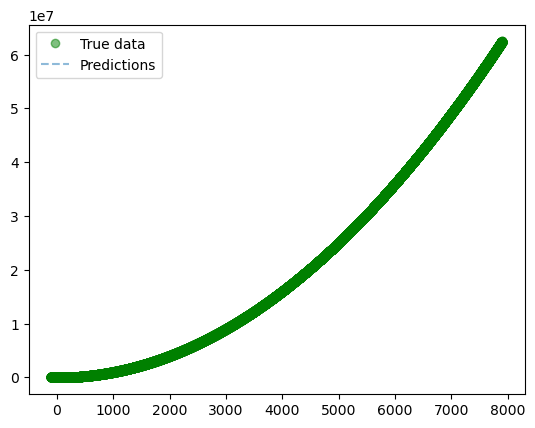

In [8]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if enableGpu:
        predicted = model(Variable(torch.from_numpy(train_x).type(torch.FloatTensor).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(train_x).type(torch.FloatTensor))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(train_x, train_y, 'go', label='True data', alpha=0.5)
plt.plot(train_x, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()